## Spatial Structure of Rain

In [1]:
%matplotlib inline
from raingage import *

In [2]:
path = "./input/"

In [3]:
rg = RainGage(path=path, df_file="Philadelphia_raingage_1996_2015_NAN_filled_time_indexed.dat")

In [4]:
import rpy2.robjects as robjects
from rpy2.robjects import r, pandas2ri

### To get the wettest of each time step

In [5]:
rg.get_wettest()

In [6]:
# run r commands to get the SVG
foo = r('SVG_data = read.table("./SVG_data", sep=",",header = TRUE) \n' +
        'source("SVG.r") \n'+
        'SVG_tab <- get_SVG(SVG_data, last_max=TRUE, cressie=TRUE)\n'
        )
df = pd.DataFrame(robjects.numpy2ri.ri2numpy(robjects.globalenv['SVG_tab']))
df.index = df.dist
names=['np', 'dist']
for t in rg.wettest.columns[5::]:
    names.append(t)
df.columns = names

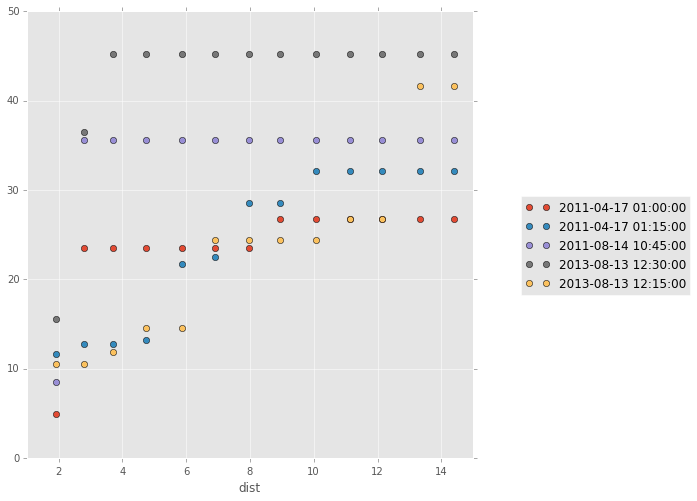

In [7]:
df[range(2,len(df.columns))].plot(style='o', figsize=(8, 8), xlim=(1,15), legend=False)
plt.legend(bbox_to_anchor=(1.5, 0.6))
plt.show()

### Get the range for a particular storm

In [8]:
rg.get_storm('2013-08-13')

In [9]:
s = {}
d = {}
for i, col in enumerate(rg.storm):
    if col not in rg.RG_lon_lat.columns:
        foo = r('SVG_data = read.table("./SVG_data", sep=",",header = TRUE) \n' +
                'source("SVG.r") \n'+
                'iSVG_tab <- get_iSVG(SVG_data, {index}, target_np=5, alpha=46.5, tol.hor=20, last_max=TRUE, max_bnd=FALSE)\n'.format(index=i+1)
                )
        df = pd.DataFrame(robjects.numpy2ri.ri2numpy(robjects.globalenv['iSVG_tab']))
        try:
            df.index = df.dist
        except:
            continue
        d.update({col: df})
        s.update({col: (df['gamma'].idxmax(axis=0), df['np'].sum())})
df = pd.DataFrame(s).transpose()
df.columns=['dist', 'np']

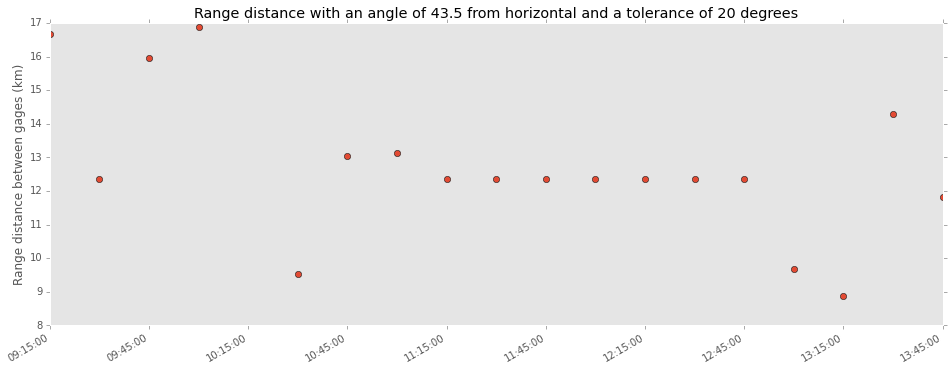

In [10]:
df['dist'].plot(figsize=(16,6), style=['o'],secondary_y='np')
plt.ylabel('Range distance between gages (km)')
plt.title('Range distance with an angle of 43.5 from horizontal and a tolerance of 20 degrees')
plt.savefig('./output/2013-08-13 range with angle 43.jpg')
plt.show()